In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

sns.set_theme()
sns.set(font_scale = 1.2)

# Reading data

In [8]:
results_df = pd.DataFrame(columns=["system_name", "run_id", "latency", "operation", "on_leader", "n_nodes", "n_clients", "order_on_write", "experiment"])


for f in glob.glob("results/experiment2_False_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_False_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_True_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_True_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

# df = pd.read_csv('results/final/perf_exp_1.csv')
df = results_df
df.latency = df.latency * 1000


df = df.rename(columns={"n_nodes": "Nodes", "operation": "Operation", "experiment": "Experiment"})

df["Experiment"] = df["Experiment"].apply(lambda x: "Read Heavy" if x == "read_heavy" else "Write Heavy")
df["Type"] = df["order_on_write"].apply(lambda x: "Benchmark" if x else "MangoDB")


In [9]:
quantiles = np.linspace(0.8, 1, 512)

q_df = df.groupby(['Operation', 'Nodes', 'order_on_write', "Experiment"]).latency.quantile([.8, .9, .91, .92, .93, .94, .95, .98, .99, .999]).reset_index()


Read Heavy
Write Heavy


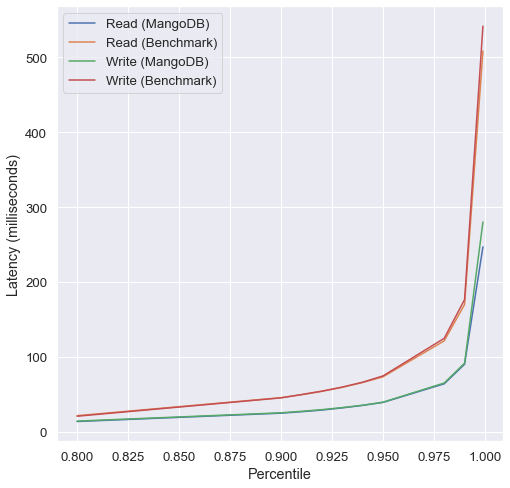

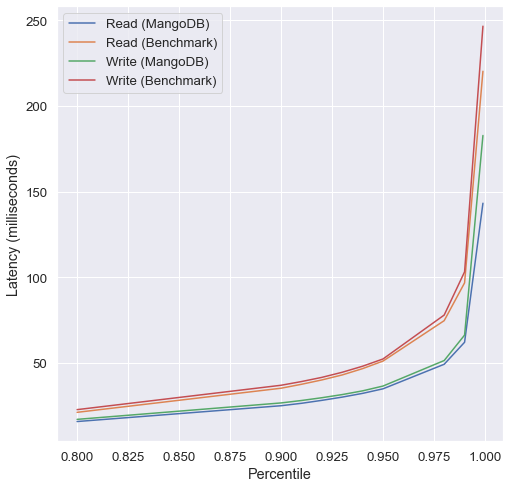

In [10]:
for group_name, group_df in q_df[q_df["Nodes"] == 4].groupby(["Experiment"]):
    print(group_name)
    ax = None
    for group, group_df2 in group_df.groupby(["Operation", "order_on_write"]):
        ax = group_df2.plot(x='level_4', y='latency', figsize=(8, 8), label=group, ax=ax)
    plt.legend(labels=["Read (MangoDB)","Read (Benchmark)", "Write (MangoDB)", "Write (Benchmark)"])
    plt.xlabel("Percentile")
    plt.ylabel("Latency (milliseconds)")
    plt.savefig("results/exp_2_{}.png".format(group_name.lower().replace(" ", "_")), bbox_inches='tight', dpi=300)

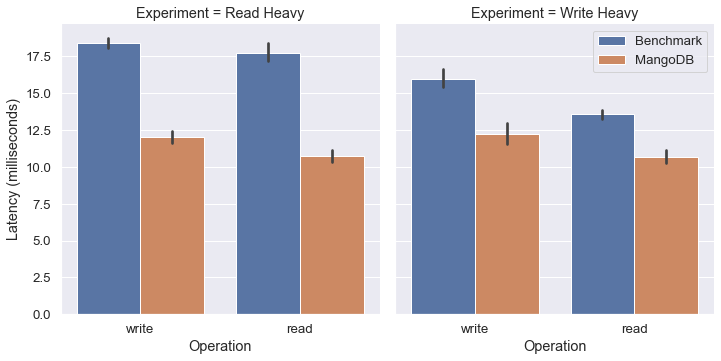

In [11]:
g = sns.catplot(kind="bar", x="Operation", y="latency", hue="Type", hue_order=["Benchmark", "MangoDB"], col="Experiment", data=df[df["Nodes"] == 4], legend_out=False, legend=False)
g.set_ylabels("Latency (milliseconds)")
g.set_xlabels("Operation")
plt.legend(loc='upper right')

hue_labels = ['Benchmark', 'MangoDB']

leg_handles = g.axes[0][1].get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Benchmark', 'MangoDB'])

plt.savefig("results/exp_2_workload_barplot.png", bbox_inches='tight', dpi=300)